In [1]:
import numpy as np
from binomial import Binomial
from calibration import calibration
from rcn import rcn
import statsmodels.formula.api as smf
from scipy.optimize import minimize

Interest rate  -0.0078
Dividend yield 0.0278
------------------------------
Minimum found!
Func value     11991.8516
Up             1.0564
Down           0.9412
------------------------------


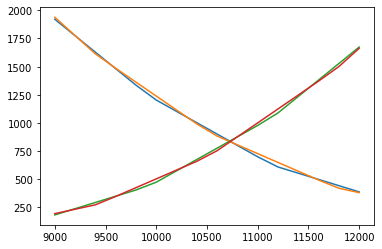

In [2]:
"""Run callibration file and return the interest rate, div yield, u and d"""
r, y, u, d = calibration()

In [3]:
#Q1)
dt = 1/12
i0 = 11118
c = 0.1

In [4]:
note  = rcn(r, dt, i0, y, u, d)
RCN = note.price_rcn(alpha=1, c=c)
BRCN = note.price_brcn(alpha=1, beta=0.8, c=c)
print('Price of simple RCN {:.4f}\nPrice of barrier RCN {:.4f}'.format(RCN, BRCN))

Price of simple RCN 1.9113
Price of barrier RCN 1.9398


In [16]:
def f(c, *arg):
    al, _ = arg
    price  = note.price_rcn(alpha=al, c=c)
    return (1 - price)**2

def g(c, *arg):
    al, bt = arg
    #print(str(eval(str(note.price_) + type)))
    price  = note.price_brcn(alpha=al, beta=beta, c=c)
    return (1 - price)**2


#res = minimize(f, 0, args=(alpha, beta), method='COBYLA')
#if res.success:
#    print('Minimum found!')
#    c = res.x
#    print('Par coupon rate for RCN={:.2%}'.format(c))
alpha = 1
beta= 0.8
for fun in [f, g]:
    res = minimize(fun, 0, args=(alpha, beta), method='COBYLA')
    if res.success:
        print('Minimum found!')
        c = res.x
        #print(str(fun))
        if fun == f:
            type='RCN'
        elif fun==g:
            type = 'BRCN'
            print('Par coupon rate for'+str(type)+' ={:.2%}'.format(c))

Minimum found!
Minimum found!
Par coupon rate forBRCN =2.21%


In [ ]:
alpha = np.array([0.5, 0.75, 1])
beta = [b*alpha for b in []]
